# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

# Copicode Team

### Member:

- Lê Hoài Bảo
- Ngô Bá Hoàng Thiên

## Question:
- Where are the best cocoa beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocoa solids percentage and rating?

In [0]:
# import all the package

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# read the data

chocolate_bar_df = pd.read_csv("./chocolate.csv")
chocolate_bar_df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [0]:
# Now we see that name of columns is not good right. So we fix it for easy to see and using
old_columns = chocolate_bar_df.columns
new_columns = ["Company", "Species", "REF", "Review_year", "Cocoa_percent", "Company_location", "Rating", "Type", "Country_collect"]
chocolate_bar_df = chocolate_bar_df.rename(columns=dict(zip(old_columns,new_columns)))

In [0]:
# read decribe

chocolate_bar_df.describe()

,REF,Review_year,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [0]:
# read info of data

chocolate_bar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company             1795 non-null object
Species             1795 non-null object
REF                 1795 non-null int64
Review_year         1795 non-null int64
Cocoa_percent       1795 non-null object
Company_location    1795 non-null object
Rating              1795 non-null float64
Type                1794 non-null object
Country_collect     1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
# see first 5 rows
chocolate_bar_df.head()

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [0]:
# see last 5 rows
chocolate_bar_df.tail()

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [0]:
# check NaN values in data
chocolate_bar_df.isna().values.any()

True

In [0]:
# List all NaN values
chocolate_bar_df[chocolate_bar_df.isnull().any(axis=1)]

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [0]:
# get all type of Company_location
chocolate_bar_df["Company_location"].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [0]:
# get all of Type
chocolate_bar_df["Type"].unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [0]:
# get all of Country_collect
chocolate_bar_df["Country_collect"].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [0]:
# seeing top10 of species
chocolate_bar_df["Species"].value_counts().head(10)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Chuao                 19
Sambirano             19
Ocumare               17
Papua New Guinea      15
Ghana                 15
Name: Species, dtype: int64

In [0]:
chocolate_bar_df[chocolate_bar_df["Cocoa_percent"] == chocolate_bar_df["Cocoa_percent"].max()]

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
1120,Michel Cluizel,Noir Infini,81,2006,99%,France,2.00,,
1623,TCHO,Peru- Ecuador,915,2012,99%,U.S.A.,3.25,,"Peru, Ecuador"


In [0]:
# how many species
chocolate_bar_df["Species"].nunique()

1039

In [0]:
# top 10 Company have largest species
chocolate_bar_df["Company"].value_counts().head(10)

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Guittard                      22
Domori                        22
Arete                         22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Name: Company, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


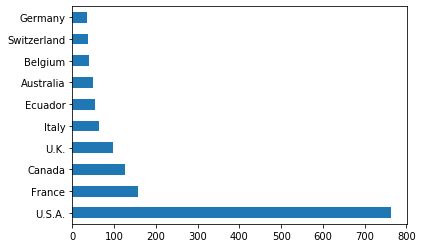

In [0]:
#Top 10 countries with highest amount of chocolate vendors
chocolate_bar_df["Company_location"].value_counts().head(10).plot('barh')

In [0]:
# Comparison of the Maximum Cocoa Percentage and the Mean Cocoa Percentage
data_100=chocolate_bar_df[chocolate_bar_df['Cocoa_percent']=='100%']
data_100.head()

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
125,Artisan du Chocolat,Venezuela,486,2010,100%,U.K.,1.75,,Venezuela
245,Bonnat,One Hundred,81,2006,100%,France,1.50,,
249,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,100%,Ecuador,1.50,Forastero (Arriba),Ecuador
330,C-Amaro,Ecuador,1185,2013,100%,Italy,3.50,,Ecuador
437,Claudio Corallo,Principe,252,2008,100%,Sao Tome,1.00,Forastero,Sao Tome & Principe


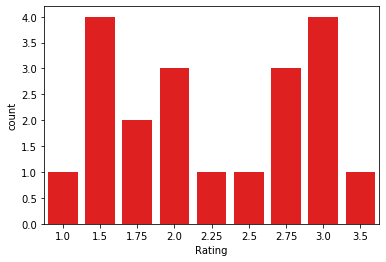

In [0]:
sns.countplot(x='Rating', data= data_100, color='red')

In [0]:
data_70=chocolate_bar_df[chocolate_bar_df['Cocoa_percent']=='70%']
data_70.head()

,Company,Species,REF,Review_year,Cocoa_percent,Company_location,Rating,Type,Country_collect
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


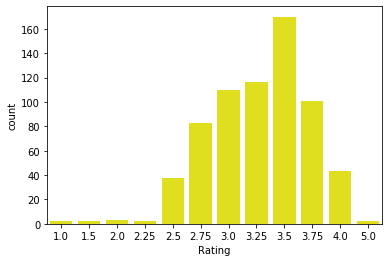

In [0]:
sns.countplot(x='Rating', data= data_70, color='yellow')

We can see that most chocolate bars that have a cocoa percent of 70% do much better than if they have more or less cocoa

In [0]:
# Which countries produce the highest-rated bars?
data_high_rated = chocolate_bar_df.groupby('Country_collect')['Rating'].max().sort_values(ascending=False)
data_high_rated.head(20)

Country_collect
                                5.0
Venezuela                       5.0
Guatemala                       4.0
Sao Tome & Principe             4.0
Sao Tome                        4.0
Peru, Dom. Rep                  4.0
Peru                            4.0
Papua New Guinea                4.0
Nicaragua                       4.0
Madagascar                      4.0
Jamaica                         4.0
Indonesia                       4.0
Haiti                           4.0
Guat., D.R., Peru, Mad., PNG    4.0
St. Lucia                       4.0
Gre., PNG, Haw., Haiti, Mad     4.0
Ghana                           4.0
Ecuador                         4.0
Dominican Republic              4.0
Dom. Rep., Madagascar           4.0
Name: Rating, dtype: float64